In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=loseit_all.iloc[:,2:67]

In [ ]:
y=loseit_all['label']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

In [ ]:
### plot ROC Curve and calculated accuracy scores for first model with original dataset

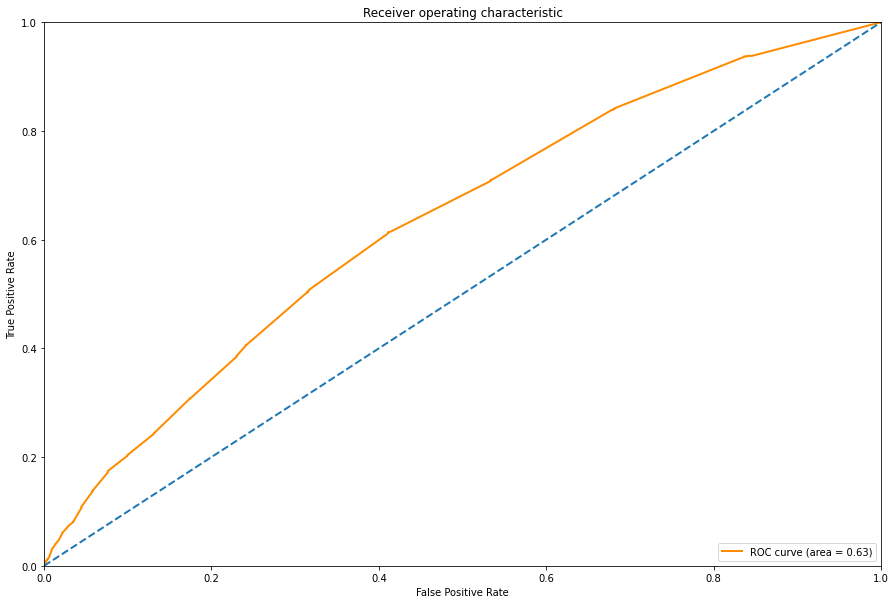

In [ ]:
y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class=rf.predict(X_test)

In [ ]:
print("recall1:",metrics.recall_score(y_test, y_pred_class,pos_label='unwelcome'))
print("f1_score1:",metrics.f1_score(y_test, y_pred_class,pos_label='unwelcome'))
print('precision1:',metrics.precision_score(y_test, y_pred_class,pos_label='unwelcome'))

recall1: 0.002657218777679362
f1_score1: 0.0052173913043478265
precision1: 0.14285714285714285


In [ ]:
#### deal with imbalance sample-up sample

In [ ]:
from sklearn.utils import resample

In [ ]:
new_sample=pd.concat([X_train, y_train], axis=1)

In [ ]:
unwelcome = new_sample[new_sample.label=='unwelcome']
supportive = new_sample[new_sample.label=='supportive']

In [ ]:
unwelcome_upsampled = resample(unwelcome,
                          replace=True, # sample with replacement
                          n_samples=len(supportive), # match number in majority class
                          random_state=27) # reproducible results

In [ ]:
up_sampled=pd.concat([supportive, unwelcome_upsampled])

In [ ]:
new_X_train=up_sampled.iloc[:,0:65]
new_y_train=up_sampled['label']

In [ ]:
rf_new = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_new.fit(new_X_train, new_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

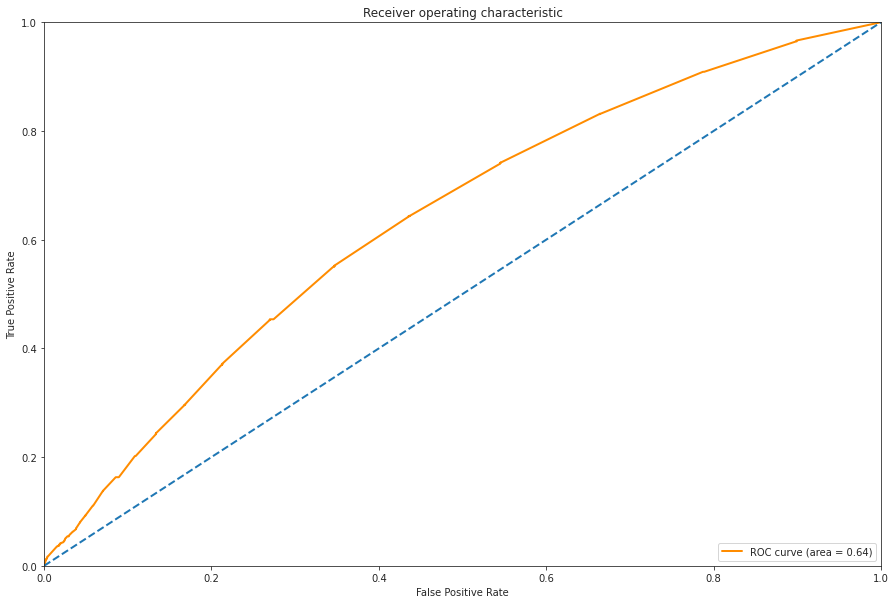

In [ ]:
y_pred_new = [x[1] for x in rf_new.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_new, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_new=rf_new.predict(X_test)

In [ ]:
print("recall2:",metrics.recall_score(y_test, y_pred_class_new,pos_label='unwelcome'))
print("f1_score2:",metrics.f1_score(y_test, y_pred_class_new,pos_label='unwelcome'))
print('precision2:',metrics.precision_score(y_test, y_pred_class_new,pos_label='unwelcome'))

recall2: 0.03631532329495128
f1_score2: 0.04715353651523864
precision2: 0.06721311475409836


In [ ]:
### using SMOTE approach to balance two classes

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=27, ratio=1.0)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rf_smote = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

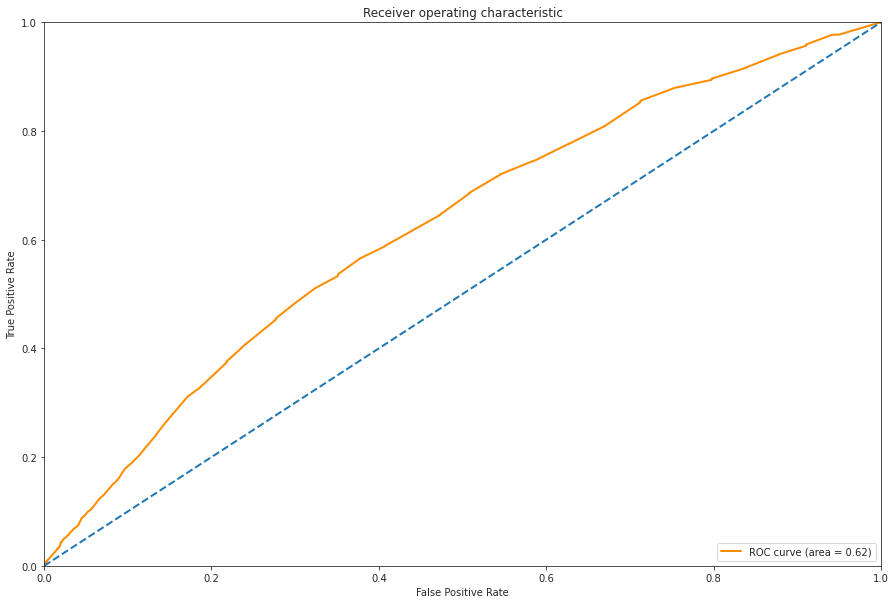

In [ ]:
y_pred_smote = [x[1] for x in rf_smote.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_smote, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_smote=rf_smote.predict(X_test)

In [ ]:
print("recall3:",metrics.recall_score(y_test, y_pred_class_smote,pos_label='unwelcome'))
print("f1_score3:",metrics.f1_score(y_test, y_pred_class_smote,pos_label='unwelcome'))

recall3: 0.05225863596102746
f1_score3: 0.05714285714285714


In [ ]:
metrics.precision_score(y_test, y_pred_class_smote,pos_label='unwelcome')

0.06303418803418803

In [ ]:
### test 'under sample' approach

In [ ]:
supportive_downsampled = resample(supportive,
                                replace = False, # sample without replacement
                                n_samples = len(unwelcome), # match minority n
                                random_state = 27) # reproducible results

In [ ]:
down_sampled=pd.concat([supportive_downsampled,unwelcome])
down_sampled.label.value_counts()

unwelcome     3394
supportive    3394
Name: label, dtype: int64

In [ ]:
X_train_down=down_sampled.iloc[:,0:65]
y_train_down=down_sampled['label']

In [ ]:
rf_down = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_down.fit(X_train_down, y_train_down)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

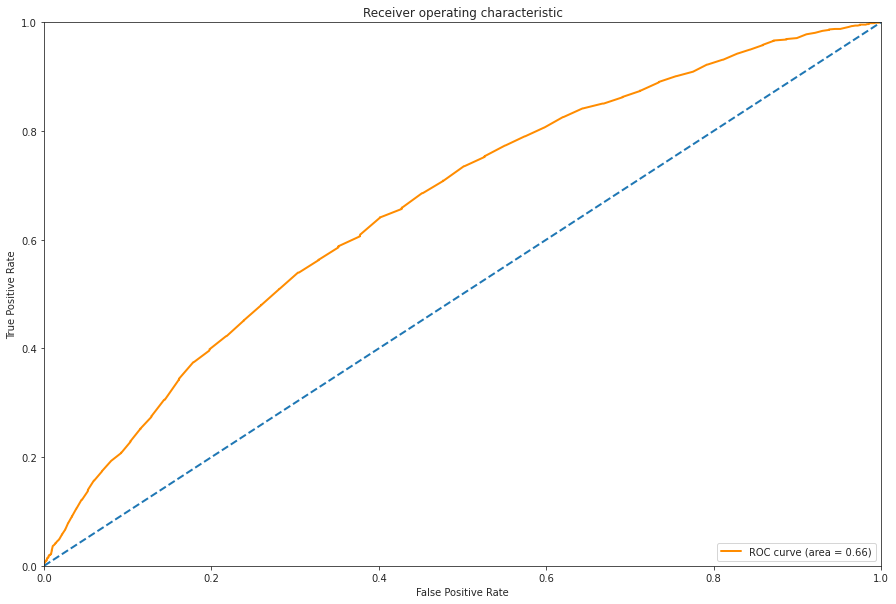

In [ ]:
y_pred_down = [x[1] for x in rf_down.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_down, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_down=rf_down.predict(X_test)

In [ ]:
print("recall4:",metrics.recall_score(y_test, y_pred_class_down,pos_label='unwelcome'))
print("f1_score4:",metrics.f1_score(y_test, y_pred_class_down,pos_label='unwelcome'))
print('precision4:',metrics.precision_score(y_test, y_pred_class_down,pos_label='unwelcome'))

recall4: 0.6093888396811338
f1_score4: 0.09562860518451594
precision4: 0.05188536953242836


In [ ]:
#### compare different model with 'under sample' approach

In [ ]:
### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_down = LogisticRegression(solver='sag')
lr_down.fit(X_train_down, y_train_down)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

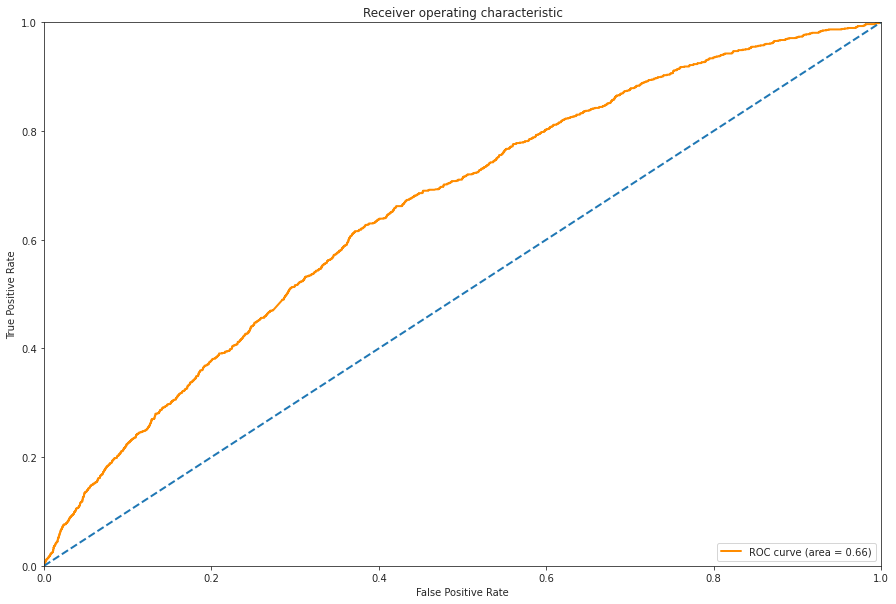

In [ ]:
y_pred_log_down = [x[1] for x in lr_down.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_down, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_log_down=lr_down.predict(X_test)

In [ ]:
print("recall6:",metrics.recall_score(y_test, y_pred_class_log_down,pos_label='unwelcome'))
print("f1_score6:",metrics.f1_score(y_test, y_pred_class_log_down,pos_label='unwelcome'))
print('precision6:',metrics.precision_score(y_test, y_pred_class_log_down,pos_label='unwelcome'))

recall6: 0.579273693534101
f1_score6: 0.09666691301455915
precision6: 0.052733430091920656


In [ ]:
### test SVC model with 'under sample' approach

In [ ]:
from sklearn.svm import SVC # "Support Vector Classifier" 

In [ ]:
svc_down = SVC()
svc_down.probability=True
svc_down.fit(X_train_down,y_train_down)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

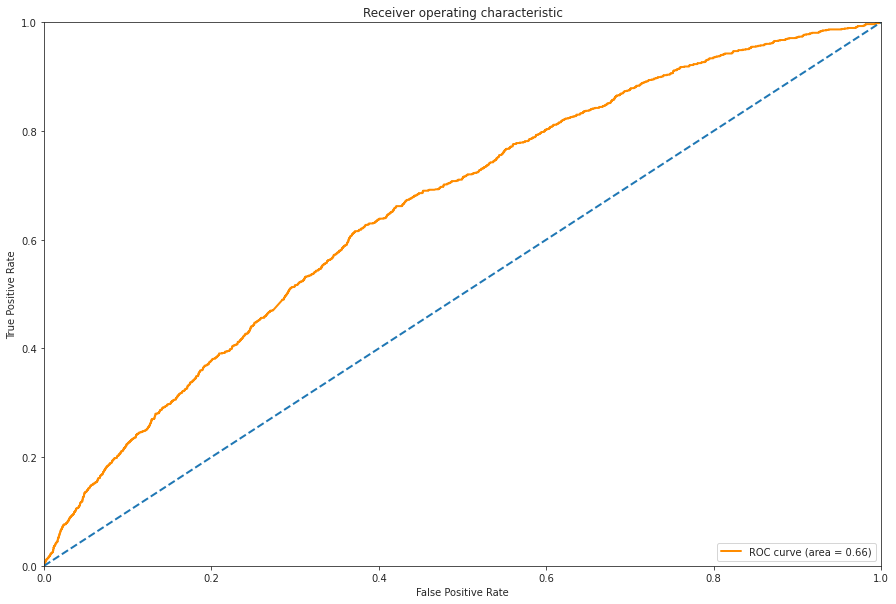

In [ ]:
y_pred_svc_down = [x[1] for x in svc_down.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_down, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_svc_down=svc_down.predict(X_test)

In [ ]:
print("recall8:",metrics.recall_score(y_test, y_pred_class_svc_down,pos_label='unwelcome'))
print("f1_score8:",metrics.f1_score(y_test, y_pred_class_svc_down,pos_label='unwelcome'))
print('precision8:',metrics.precision_score(y_test, y_pred_class_svc_down,pos_label='unwelcome'))

recall8: 0.6262178919397697
f1_score8: 0.09486749412948677
precision8: 0.051321138211382115
